In [1]:
%pip install scapy
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scapy
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgr

In [2]:
from scapy.all import rdpcap, IP, ICMP
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import seaborn as sns

In [43]:
def leitura_pcap(pcap_file):
    # Leitura do arquivo pcap
    Pacotes = rdpcap(pcap_file)
    print(Pacotes)
    
    # Listas com informações dos pacotes
    ips_origem = []
    ips_destino = []
    tamanho_pacotes = []
    timestamps = []
    
    # Extração de informações diretamente do arquivo pcap
    for Pacote in Pacotes:
        # Checa se o pacote é um pacote IP e ICMP
        if IP in Pacote and ICMP in Pacote:
            ips_origem.append(Pacote[IP].src)
            ips_destino.append(Pacote[IP].dst)
            timestamps.append(float(Pacote.time))
            tamanho_pacotes.append(len(Pacote))
    
    timestamps = np.array(timestamps)
    tamanho_pacotes = np.array(tamanho_pacotes)
    
    # Calculo das métricas com base nas informações extraídas
    # Métricas temporais
    tempo = timestamps[-1] - timestamps[0]
    intervalos = np.diff(timestamps)
    intervalo_medio = np.mean(intervalos)

    # Métricas de pacotes
    n_pacotes = len(Pacotes)  
    n_bytes = sum(tamanho_pacotes)
    vazao = n_bytes * 8 / tempo

    
    # Organização das informações em um DataFrame Pandas com timestamps, tamanho dos pacotes, ips de origem e destino
    df = pd.DataFrame({
        'timestamp': timestamps,
        'tamanho_pacote': tamanho_pacotes,
        'ip_origem': ips_origem,
        'ip_destino': ips_destino
    })
    
    # Print basic statistics
    print(f"Número de pacotes totais: {n_pacotes}")
    print(f"Número de bytes totais: {n_bytes}")
    print(f"Duração em segundos: {tempo:.2f} seconds")
    print(f"Vazão média: {vazao/1000:.2f} kbps")
    print(f"Intervalo médio entre pacotes: {intervalo_medio*1000:.2f} ms")

    return df
    

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plotagem_graficos(df):
    # Extração de dados do DataFrame
    timestamps = df['timestamp']
    tamanho_pacotes = df['tamanho_pacote']
    tempo = timestamps.iloc[-1] - timestamps.iloc[0] if len(timestamps) > 1 else 0
    intervalos = np.diff(timestamps) if len(timestamps) > 1 else []
    n_bytes = np.sum(tamanho_pacotes)

    plt.figure(figsize=(15, 10))

    # Plot 1: Tamanho dos pacotes ao longo do tempo
    plt.subplot(2, 3, 1)
    if len(timestamps) > 1:
        # Plotar tamanho dos pacotes ao longo do tempo
        plt.plot(timestamps - timestamps.iloc[0], tamanho_pacotes, marker='o', linestyle='-')
        plt.title('Tamanho dos Pacotes ao Longo do Tempo', fontsize=14)
        plt.xlabel('Tempo (segundos)', fontsize=12)
        plt.ylabel('Tamanho do Pacote (bytes)', fontsize=12)

    # Plot 2: Histograma dos intervalos entre pacotes
    plt.subplot(2, 3, 2)
    if len(intervalos) > 0:
        # Filtrar outliers (intervalos maiores que o percentil 95, ajuda na visualização do gráfico)
        limite_superior = np.percentile(intervalos, 95)
        intervalos_filtrados = intervalos[intervalos <= limite_superior]

        # Plotar histograma com linha de densidade
        sns.histplot(intervalos_filtrados * 1000, bins=20, kde=True, edgecolor='black', alpha=0.7)
        plt.title('Distribuição dos Intervalos entre Pacotes', fontsize=14)
        plt.xlabel('Intervalo (ms)', fontsize=12)
        plt.ylabel('Frequência', fontsize=12)
        plt.xlim(0, limite_superior * 1000) 

    # Plot 3: Throughput acumulado
    plt.subplot(2, 3, 3)
    if len(timestamps) > 0:
        # Calculo do throughput acumulado
        cumulative_bytes = np.cumsum(df['tamanho_pacote'])
        plt.plot(timestamps - timestamps.iloc[0], cumulative_bytes * 8 / 1000, linestyle='-')
        plt.title('Throughput Acumulado', fontsize=14)
        plt.xlabel('Tempo (s)', fontsize=12)
        plt.ylabel('kbits transmitidos', fontsize=12)

    # Plot 4: Densidade dos Intervalos
    plt.subplot(2, 3, 4)
    if len(intervalos) > 0:
        # Utiliza o seaborn para plotar a densidade
        sns.kdeplot(intervalos, fill=False)
        plt.title('Densidade dos Intervalos', fontsize=14)
        plt.xlabel('Intervalo (s)', fontsize=12)


    plt.tight_layout()
    plt.savefig('analise.png', dpi=300)
    plt.show()

<captura.pcap: TCP:0 UDP:0 ICMP:1600 Other:0>
Número de pacotes totais: 1600
Número de bytes totais: 156800
Duração em segundos: 450.16 seconds
Vazão média: 2.79 kbps
Intervalo médio entre pacotes: 281.53 ms


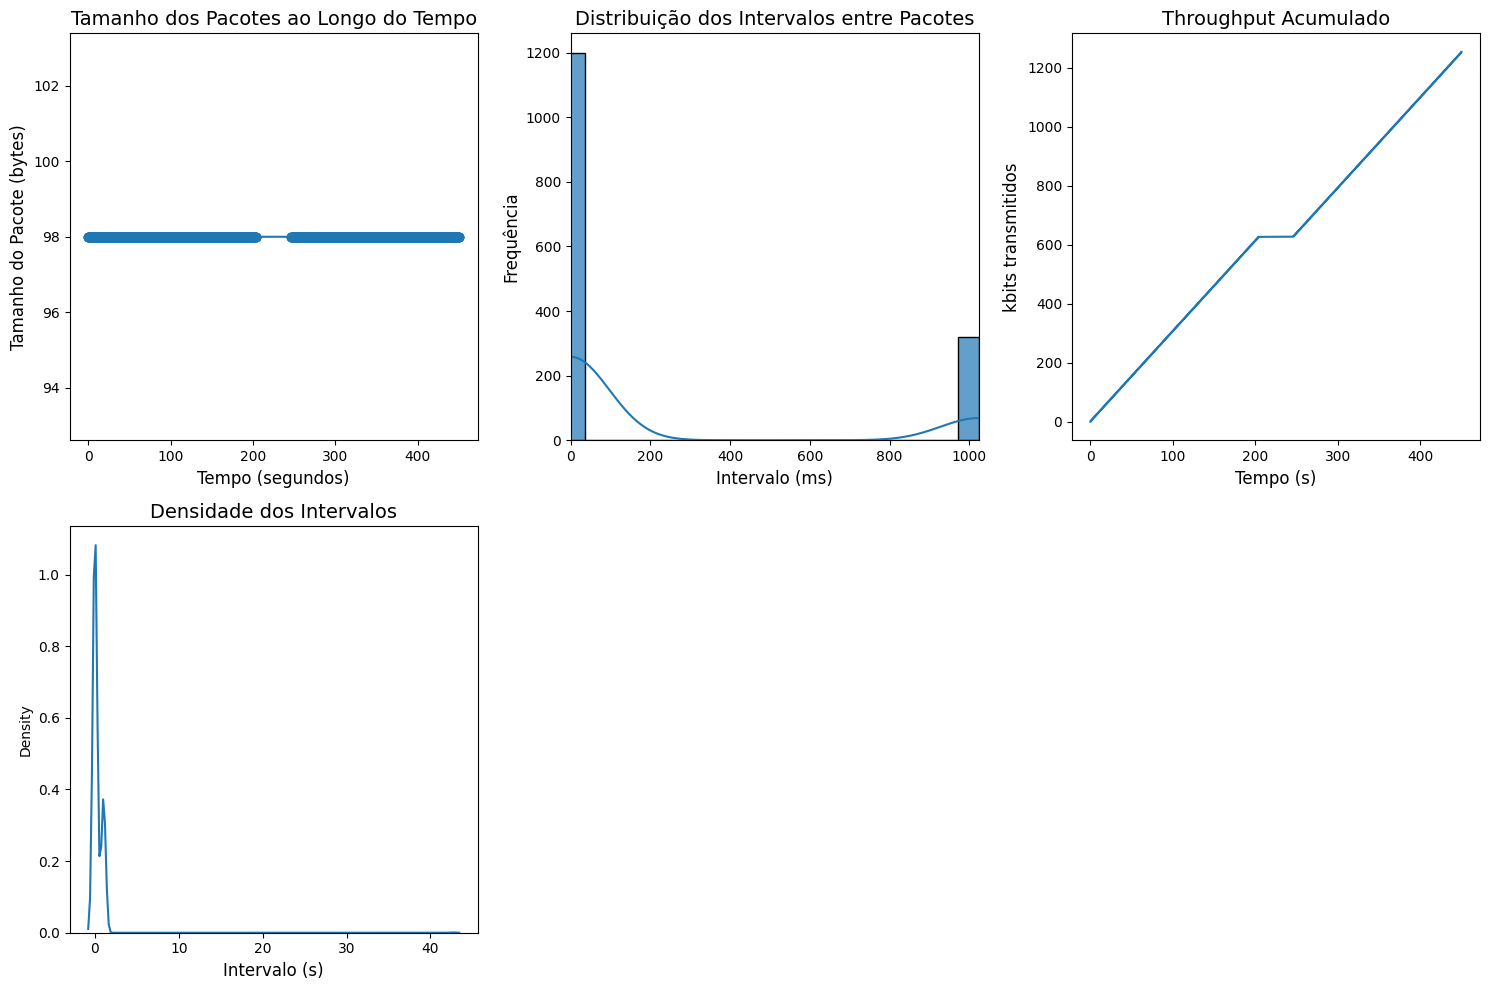

In [52]:
if __name__ == "__main__":
    # leitura de arquivo pcap e plotagem dos gráficos
    pcap_file = "/Users/luizasouza/Git/MC833A/Projeto2/captura.pcap"
    df = leitura_pcap(pcap_file) 
    plotagem_graficos(df)
    
    